In [1]:
import pandas as pd
import numpy as np
import subprocess
import random
from scipy import stats
import glob
import math
import csv
import sys
import os

import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"
%matplotlib inline

In [2]:
# declarations
base_dir_data = "/ccb/salz8-1/avaraby/tx_noise/data/"
base_dir_out = "/ccb/salz8-1/avaraby/tx_noise/full_analysis_25022020/GTEx_aggs/"
out_dir = "/ccb/salz8-1/avaraby/tx_noise/full_analysis_25022020/sim_samples/"

readlen = 101

gff3cols=["seqid","source","type","start","end","score","strand","phase","attributes"]

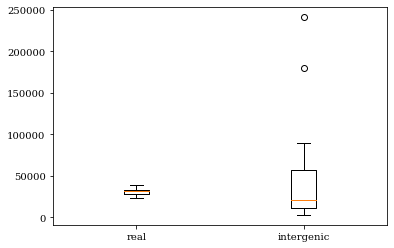

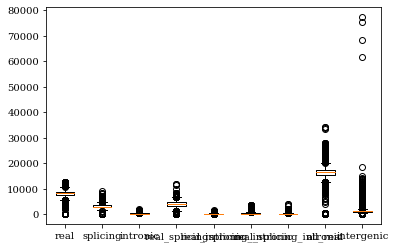

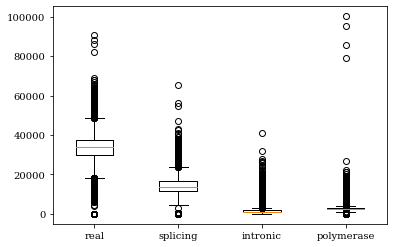

In [3]:
# load the distribution of the number of real and noise loci per tissue first
t_loc = pd.read_csv(base_dir_out+"res.num_locs_tissue")

fig,ax = plt.subplots()
ax.boxplot(t_loc.T,labels=t_loc.T.index.tolist())
plt.show()


# now should subset the tissue tx/loc
# based on the number of loci per sample
s_loc = pd.read_csv(base_dir_out+"res.num_locs_sample")
s_loc

fig,ax = plt.subplots()
ax.boxplot(s_loc.T,labels=s_loc.T.index.tolist())

tx_ns = pd.read_csv(base_dir_out+"res.num_tx_per_sample")
tx_ns.head()
fig,ax = plt.subplots()
ax.boxplot(tx_ns[["real","splicing","intronic","polymerase"]].T,labels=tx_ns[["real","splicing","intronic","polymerase"]].T.index.tolist())
plt.show()

plt.show()

In [16]:
# load the distribution of the number of real and noise loci per tissue first
real = pd.read_csv(out_dir+"real.sample0.gtf",sep="\t",names=gff3cols)
real["tid"] = real["attributes"].str.split("transcript_id \"",expand=True)[1].str.split("\"",expand=True)[0]
real["gid"] = real["attributes"].str.split("gene_id \"",expand=True)[1].str.split("\"",expand=True)[0]
sim_real_set = set(real["gid"])

splicing = pd.read_csv(out_dir+"splicing.sample0.gtf",sep="\t",names=gff3cols)
splicing["tid"] = splicing["attributes"].str.split("transcript_id \"",expand=True)[1].str.split("\"",expand=True)[0]
splicing["gid"] = splicing["attributes"].str.split("gene_id \"",expand=True)[1].str.split("\"",expand=True)[0]
sim_splicing_set = set(splicing["gid"])

intronic = pd.read_csv(out_dir+"intronic.sample0.gtf",sep="\t",names=gff3cols)
intronic["tid"] = intronic["attributes"].str.split("transcript_id \"",expand=True)[1].str.split("\"",expand=True)[0]
intronic["gid"] = intronic["attributes"].str.split("gene_id \"",expand=True)[1].str.split("\"",expand=True)[0]
sim_intronic_set = set(intronic["gid"])

pol = pd.read_csv(out_dir+"pol.sample0.gtf",sep="\t",names=gff3cols)
pol["tid"] = pol["attributes"].str.split("transcript_id \"",expand=True)[1].str.split("\"",expand=True)[0]
pol["gid"] = pol["attributes"].str.split("gene_id \"",expand=True)[1].str.split("\"",expand=True)[0]
sim_pol_set = set(pol["gid"])

print("number of real genes in the sample: "+str(len(sim_real_set.union(sim_splicing_set.union(sim_intronic_set)))))
print("number of intergenic genes in the sample: "+str(len(sim_pol_set)))

number of real genes in the sample: 14938
number of intergenic genes in the sample: 3291


In [17]:
# Now to investigate the sample information now need to get the same numbers from the current sample
real = pd.read_csv(out_dir+"real.sample0.gtf",sep="\t",names=gff3cols)
real["tid"] = real["attributes"].str.split("transcript_id \"",expand=True)[1].str.split("\"",expand=True)[0]

splicing = pd.read_csv(out_dir+"splicing.sample0.gtf",sep="\t",names=gff3cols)
splicing["tid"] = splicing["attributes"].str.split("transcript_id \"",expand=True)[1].str.split("\"",expand=True)[0]

intronic = pd.read_csv(out_dir+"intronic.sample0.gtf",sep="\t",names=gff3cols)
intronic["tid"] = intronic["attributes"].str.split("transcript_id \"",expand=True)[1].str.split("\"",expand=True)[0]

pol = pd.read_csv(out_dir+"pol.sample0.gtf",sep="\t",names=gff3cols)
pol["tid"] = pol["attributes"].str.split("transcript_id \"",expand=True)[1].str.split("\"",expand=True)[0]
print("number of real transcripts: "+str(len(set(real["tid"]))))
print("number of splicing transcripts: "+str(len(set(splicing["tid"]))))
print("number of intronic transcripts: "+str(len(set(intronic["tid"]))))
print("number of pol transcripts: "+str(len(set(pol["tid"]))))

number of real transcripts: 31830
number of splicing transcripts: 4118
number of intronic transcripts: 136
number of pol transcripts: 3610
